In [87]:
import sys
import os
myDir = os.getcwd()
sys.path.append(myDir)

from pathlib import Path
path = Path(myDir)
a=str(path.parent.absolute())

sys.path.append(a)

In [88]:
import matplotlib.pyplot as plt
import random
import pandas as pd

In [121]:

from testing_framework.StandardTester import test_algorithm
from arms.BernoulliArm import BernoulliArm
from algorithms.EpsilonGreedy import EpsilonGreedy, ind_max

def convert_to_df(raw_data):
    df = pd.DataFrame(raw_data)
    new_df = df.transpose()
    new_df.columns = ['sim_nums', 'times', 'chosen_arms', 'rewards', 'cumulative_rewards']
    return new_df

def plot_cumulative_reward(data, epsilon_list):
    for d, e in zip(data, epsilon_list):
        avg_df = d.groupby('times', as_index=False)['cumulative_rewards'].mean()
        avg_df["avg_reward"] = avg_df["cumulative_rewards"]/avg_df["times"]
        plt.plot(avg_df['times'], avg_df['cumulative_rewards'], label=str(e))
    plt.xlabel("Time")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.title("Cumulative Reward vs Time")
    plt.show()
    
def plot_avg_reward(data, epsilon_list):
    for d, e in zip(data, epsilon_list):
        # print(d)
        avg_df = d.groupby('times', as_index=False)['cumulative_rewards'].mean()
        avg_df["avg_reward"] = avg_df["cumulative_rewards"]/avg_df["times"]
        plt.plot(avg_df['times'], avg_df['avg_reward'], label=str(e))
    plt.xlabel("Time")
    plt.ylabel("Avg Reward")
    plt.legend()
    plt.title("Avg Reward vs Time")
    plt.show()


In [126]:

random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
# means = [0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.9]
# means = [0.1, 0.9]
# means = [0.01, 0.01, 0.01, 0.01, 0.09]
means = [0.9, 0.9, 0.9, 0.9, 0.99]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
data = []
print("Best arm is " + str(ind_max(means)))
f = open("standard_results.tsv", "w")
epsilon_list = [0.1, 0.2, 0.3, 0.4, 0.5]
for epsilon in epsilon_list:
    algo = EpsilonGreedy(epsilon, [], [])
    algo.initialize(n_arms)
    results = test_algorithm(algo, arms, 5000, 500)
    data.append(convert_to_df(results))
    # plot with results
    # for i in range(len(results[0])):
        # f.write(str(epsilon) + "\t")
        # f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")
# f.close()

Best arm is 2


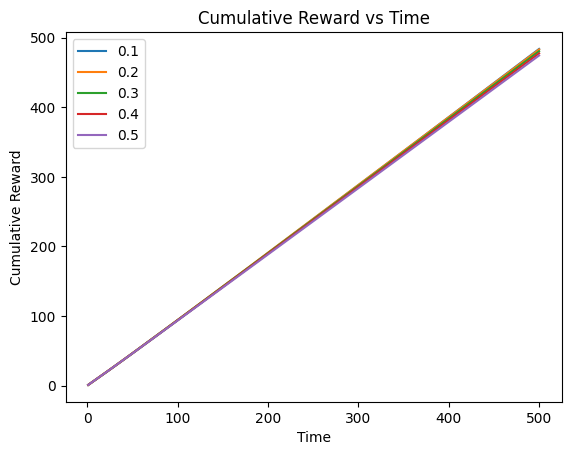

In [127]:
plot_cumulative_reward(data, epsilon_list)

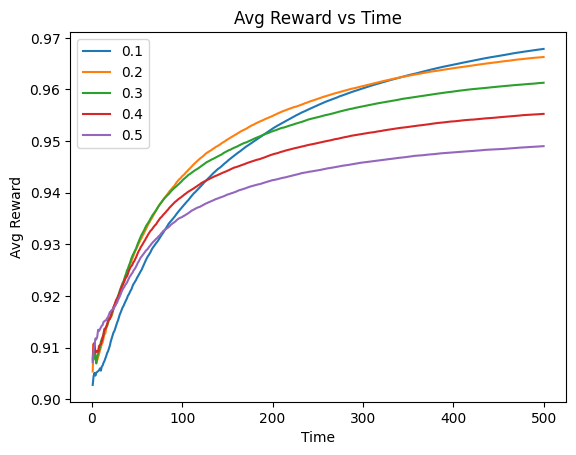

In [128]:
plot_avg_reward(data, epsilon_list)